In [1]:

import os

import matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def read_logs(log_dir, filenames):
    """Read in log files as pandas dataframes.

    :param log_dir: dir containing the files.
    :param filenames: list of filenames to read.
    :return: list of dataframes for each log file
    """
    dfs = []
    for filename in filenames:
        filepath = os.path.join(log_dir, filename)
        x = pd.read_csv(filepath)
        dfs.append(x)
    return dfs

In [3]:



def plot_layer_to_metric(title, model_dfs, baseline_df, metrics_to_plot, line_width, marker_size, figsize=(10, 12)):
    """For each metric in `metrics_to_plot`, create a line plot mapping from probed layer to metric, for each model in `model_dfs`.

    :param title: title of the plot.
    :param model_dfs: a list of dataframes with one dataframe for each probed subject model. Must contain 'model/subject_model/model_name' and 'model/pooler/layer_to_probe' columns.
    :param baseline_df:
    :param metrics_to_plot: a list of metrics to select from a model's df and plot.
    :param figsize: total size of the figure.
    """

    fig, axs = plt.subplots(1, len(metrics_to_plot), figsize=figsize)
    fig.suptitle(title, weight='bold')
    # for each metric
    for i, metric_name in enumerate(metrics_to_plot):
        axs[i].grid()
        # plot baseline
        axs[i].axhline(float(baseline_df[metric_name]),
                       color='indianred',
                       linestyle='--',
                       linewidth=line_width,
                       label=baseline_df.iloc[0]['model/subject_model/model_name']
                       )

        # plot each model
        for k, df in enumerate(model_dfs):
            df = df.sort_values('model/pooler/layer_to_probe')
            axs[i].plot(df['model/pooler/layer_to_probe'],
                        df[metric_name],
                        '.-',
                        linewidth=line_width,
                        markersize=marker_size,
                        label=df.iloc[0]['model/subject_model/model_name'])
            axs[i].legend()
            y_label = metric_name.lstrip('test/').capitalize()
            axs[i].set_ylabel(y_label)

        axs[i].set_xlabel('Layer')


In [4]:
# font settings
font = {'size': 14}

matplotlib.rc('font', **font)

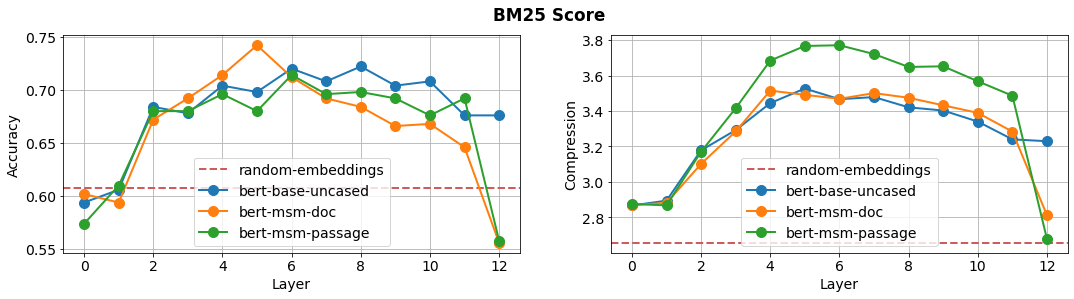

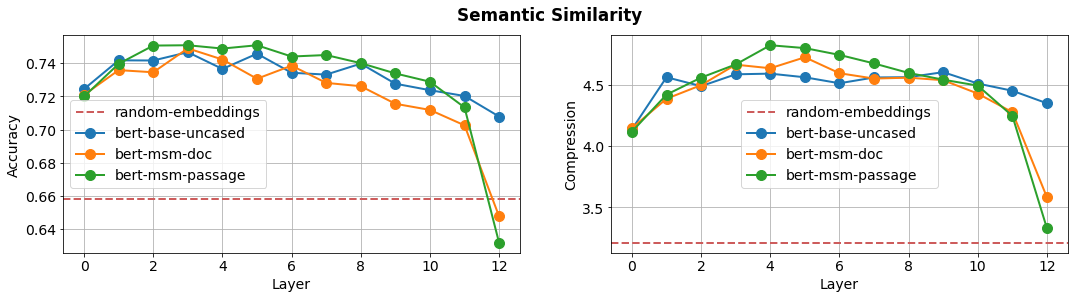

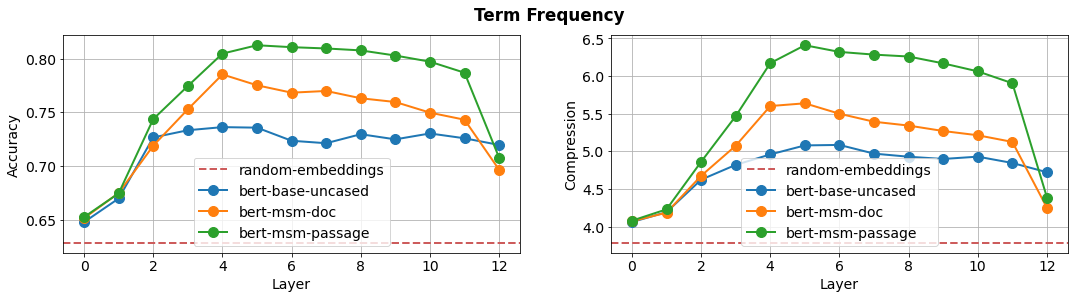

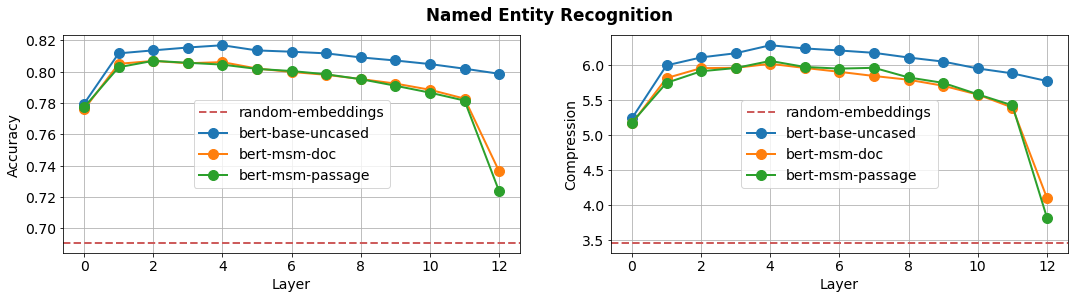

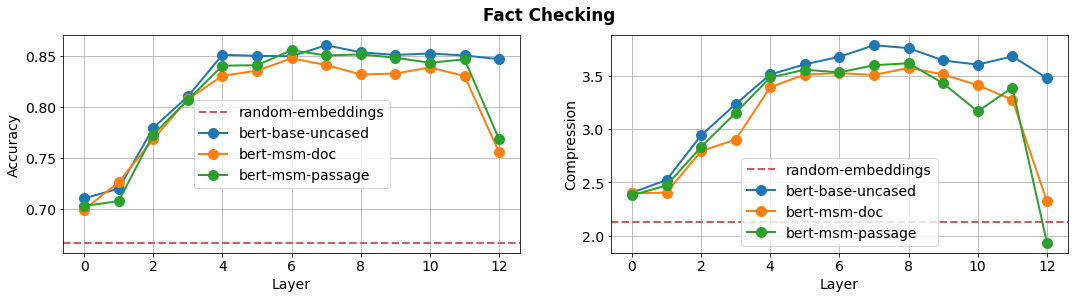

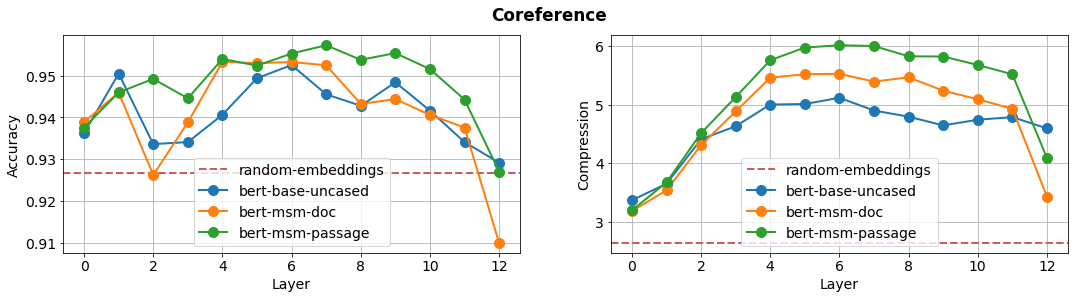

In [5]:
FIG_SIZE = (18, 4)
LINE_WIDTH = 2
MARKER_SIZE = 20

LOG_DIR = 'logs/layer_to_metric/'

BASELINE_NAME = 'random_embeddings.csv'
FILE_NAMES = ['bert_base_uncased.csv', 'bert_msm_doc.csv', 'bert_msm_passage.csv']  #, 'bert_msm_passage_05_layers.csv']
METRICS_TO_PLOT = ['test/accuracy', 'compression']  #'val/accuracy/max', 'val/loss/min']

task_to_name = {'bm25_small': 'BM25 Score',
                'sem_sim': 'Semantic Similarity',
                'term_freq': 'Term Frequency',
                'ner': 'Named Entity Recognition',
                'fact_check': 'Fact Checking',
                'coref': 'Coreference'}

for task in task_to_name:
    task_dir = os.path.join(LOG_DIR, task)

    layer_to_metric_dfs = read_logs(task_dir, FILE_NAMES)
    baseline_df = read_logs(task_dir, [BASELINE_NAME])[0]

    plot_layer_to_metric(task_to_name[task],
                         layer_to_metric_dfs,
                         baseline_df,
                         METRICS_TO_PLOT,
                         line_width=LINE_WIDTH,
                         marker_size=MARKER_SIZE,
                         figsize=FIG_SIZE)

    os.makedirs('img', exist_ok=True)
    plt.savefig('img/' + task + '.png', bbox_inches='tight')
    plt.show()